# _ryCh00


In [1]:
#import thinkdsp as td
#import thinkplot as tp
#import thinkstats2 as ts
#import thinkbayes as tb

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.signal as sg
%matplotlib inline

In [3]:
θ= np.linspace(0,1,1001)*2*np.pi
θ

array([0.        , 0.00628319, 0.01256637, ..., 6.27061894, 6.27690212,
       6.28318531])

In [4]:
x= np.cos(θ)
x

array([1.        , 0.99998026, 0.99992104, ..., 0.99992104, 0.99998026,
       1.        ])

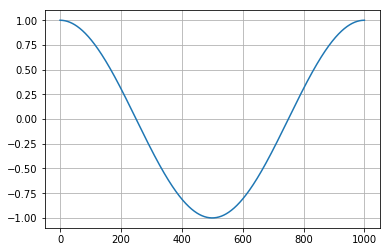

In [5]:
pl.plot(x)
pl.grid()

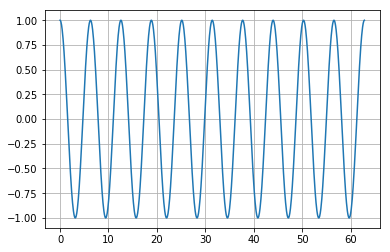

In [6]:
θ= np.linspace(0,10,1001)*2*np.pi
x= np.cos(θ)
pl.plot(θ,x)
pl.grid()

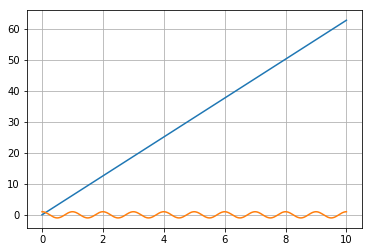

In [7]:
f=  1            # cycle/sec, Hz
ω= f   *2*np.pi # radian/sec
ϕ=  0  *2*np.pi
t=  np.linspace(0,10,1001)

θ= ω*t + ϕ
pl.figure()
pl.plot(t,θ)

x= np.cos(θ)
#pl.figure()
pl.plot(t,x)
pl.grid()

array([1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
       1.        ])

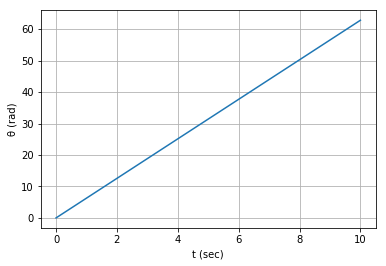

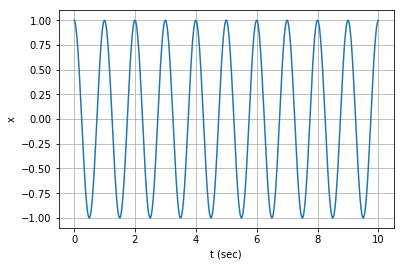

In [8]:
def cosPlot(f=1, A=1):
    #f=  1            # cycle/sec, Hz
    ω= f   *2*np.pi # radian/sec
    ϕ=  0  *2*np.pi
    t=  np.linspace(0,10,1001)

    θ= ω*t + ϕ
    pl.figure()
    pl.plot(t,θ)
    pl.xlabel('t (sec)')
    pl.ylabel('θ (rad)')
    pl.grid()

    x= np.cos(θ) *A
    pl.figure()
    pl.plot(t,x)
    
    pl.xlabel('t (sec)')
    pl.ylabel('x')
    pl.grid()
    
    return x

cosPlot()

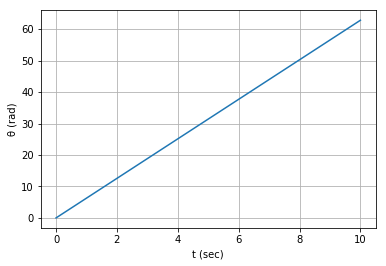

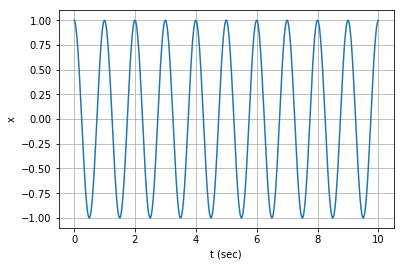

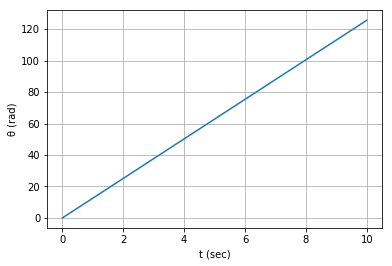

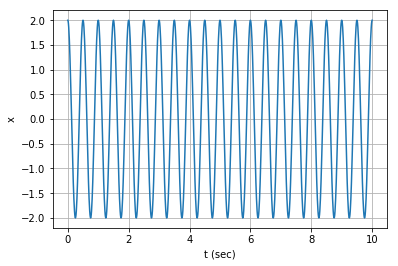

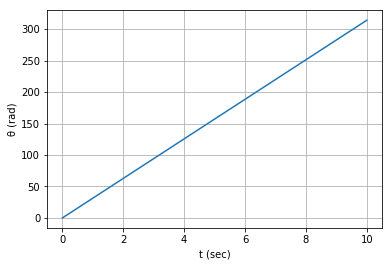

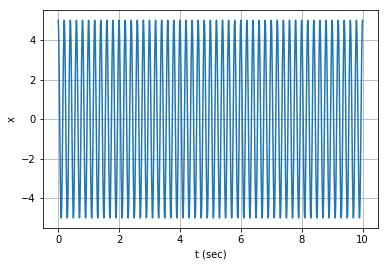

In [9]:
x= cosPlot(1)
x= cosPlot(2, 2)
x= cosPlot(5, 5)

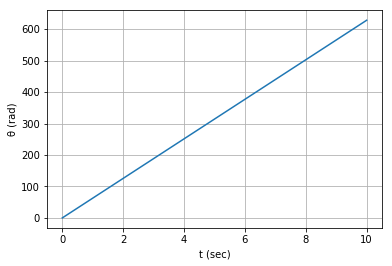

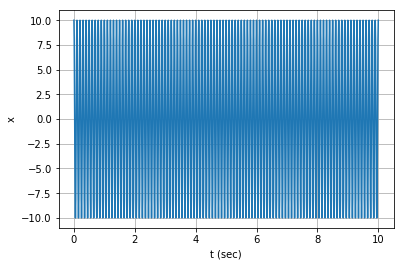

In [10]:
x= cosPlot(10, 10)

In [11]:
from IPython.display import Audio
audio = Audio(data= x, rate= 16000)
audio

In [12]:
def cosGen(f=1, A=1, T= .5, Fs=10000):
    #f=  1            # cycle/sec, Hz
    ω= f   *2*np.pi # radian/sec
    ϕ=  0  *2*np.pi
    t=  np.linspace(0,T,T*Fs+1)
    θ= ω*t + ϕ
    x= np.cos(θ) *A    
    return x

x= cosGen(f= 1000)

Fs= 10000

audio = Audio(data= x, rate= Fs)
audio


C:\Anaconda52_Py36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


In [13]:
x1= cosGen(f= 1000)
x2= cosGen(f= 1500)
x3= cosGen(f= 2000)
x= np.concatenate([x1,x2,x3])

audio = Audio(data= x, rate= Fs)
audio

C:\Anaconda52_Py36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


In [14]:
## Major Scale

r= 2**(1/12)
r ### 1.059
majorScale= np.array([0,2,4,5,7,9,11,12])
fM= 440*(r**majorScale)
fM=np.round(fM)

s= [cosGen(f= f) for f in fM]
x= np.concatenate(s)
audio = Audio(data= x, rate= Fs)
audio


C:\Anaconda52_Py36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


In [15]:
## Twinkle Star
[do, re, mi, fa, so, la, ti, Do]= [s[i] for i in range(8)]

In [16]:
twinkleStar= [
    do, do, so, so, la, la, so, so, 
    fa, fa, mi, mi, re, re, do, do,
    so, so, fa,fa,mi,mi,re,re,
    so, so, fa, fa, mi,mi,re,re,
    do, do, so, so, la, la, so, so, 
    fa, fa, mi, mi, re, re, do, do]

x= np.concatenate(twinkleStar)
a= Audio(data=x, rate=Fs)
a

In [17]:
#import librosa 
#librosa.output.write_wav('twinkleStar.wav', x, Fs, norm=False)

In [18]:
小蜜蜂= [
    so,mi,mi,mi,
    fa,re,re,re,
    do,re,mi,fa,
    so,so,so,so,
    
    so,mi,mi,mi,
    fa,re,re,re,
    do,mi,so,so,
    mi,mi,mi,mi,

    re,re,re,re,
    re,mi,fa,fa,
    mi,mi,mi,mi,
    mi,fa,so,so,

    so,mi,mi,mi,
    fa,re,re,re,
    do,mi,so,so,
    do,do,do   
]

x= np.concatenate(小蜜蜂)
a= Audio(data=x, rate=Fs)
a

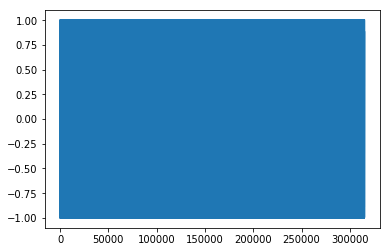

In [19]:
pl.plot(x)

In [20]:
import librosa

librosa.output.write_wav('小蜜蜂.wav', x, Fs, norm=False)

y, Fs= librosa.load('小蜜蜂.wav')

In [21]:

a= Audio(data=x, rate=Fs)
a

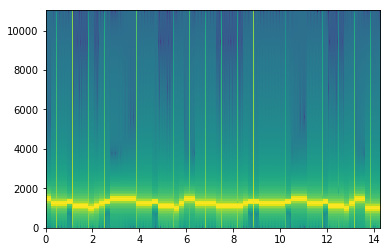

In [22]:
q= pl.specgram(x, 
             NFFT= 256, 
             Fs=   Fs)

In [23]:
import thinkdsp as td
import thinkplot as tp


In [24]:
xWave= td.Wave(x,framerate= Fs)

In [25]:
xw= xWave

In [26]:
xw.make_audio()

In [27]:
xw.ts

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       1.42884354e+01, 1.42884807e+01, 1.42885261e+01])

In [28]:
xw.segment(0,1).make_audio()

No handles with labels found to put in legend.


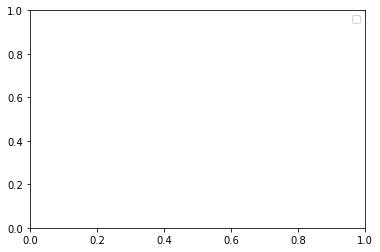

<Figure size 576x432 with 0 Axes>

In [29]:
xw.make_spectrogram(128)
tp.show()

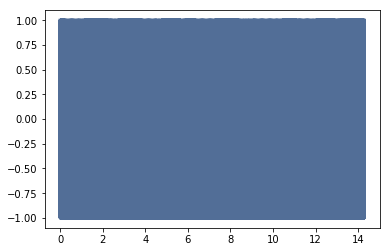

In [30]:
xw.plot()

In [31]:
X= xw.make_spectrogram(256)

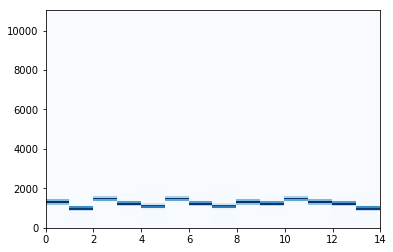

In [32]:
X.plot()

In [33]:
# w= X.make_wave()

In [34]:
np.array([])

array([], dtype=float64)

In [35]:
a= np.array([1,0,0,0])
A= np.fft.fft(a)
a1= np.fft.ifft(A)
a1

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [36]:
a1.real

array([1., 0., 0., 0.])

In [37]:
a2= np.fft.irfft(A)
a2

array([1., 0., 0., 0., 0., 0.])